# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Studentname

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


### My Answer 
#### My main conclusions are <font color='red'> all highlighted in red color. <font>

In [188]:
# Import libraries
import pandas as pd 
import numpy as np 

from statistics import mean
from scipy import stats
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
import statsmodels.stats.power as ssp #ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd # turkey HSD test

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Preparation

##### Read in Data 

In [3]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [168]:
my_df = pd.read_csv(fileName)

##### Imputing Missing Data 

In [170]:
# look up missing values, and get to know data types of them
my_df = my_df.replace(to_replace="?", value=float("NaN"))
my_df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [171]:
# for ['normalized-losses'], 40 out of 205 rows has null value.
# 25% of data has missing value, so I decided to impute missing value to median value 
my_df.loc[:, 'normalized-losses'] = pd.to_numeric(my_df.loc[:, 'normalized-losses'], errors='coerce')
HasNan = np.isnan(my_df.loc[:,'normalized-losses'])
my_df.loc[HasNan, 'normalized-losses'] = np.nanmedian(my_df.loc[:,'normalized-losses'])

In [172]:
# drop other columns, which doesn't occupy lots rows
my_df = my_df.dropna(axis=0)

##### Data Type Manipulation

In [173]:
my_df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [174]:
my_df['price'] = my_df['price'].astype(int)
my_df['horsepower'] = my_df['horsepower'].astype(int)

##### Compute Log Price Value 

In [175]:
my_df['price_log'] = np.log(my_df['price'])

## Task 1. Compare and Test Normality on ['price'] and ['price_log']
**[ Guide to my answer ]**: I will apply graphical and mathmatical method to test whether price / price log is a normal distribution. I break down the math methods to two kind of test. One is evaluating the 5% cut off directly. The other is evaluating P value, by appling Shapiro-Wilk test.  

### 1.1 Price Log 

From historagm plot below, we can see a Gaussian-like shape to the price log data, that although is not strongly the familiar bell-shape, is a rough approximation. Now we make a null hypothesis, assuming the distribution of price log is a normal distribution. Then we calculate the 5% cutoff threshold from the expected normal distribution, compared it with the real 5% cutoff from dataset. If the expected cutoff is smaller than real cutoff, we can't reject our H0.  Conclusion: It is failled reject the hypothesis. 
#### <font color = 'red'> The log of price does have a normal distribution<font/>

In [63]:
mean_price_log = my_df['price_log'].mean()
std_price_log = my_df['price_log'].std()

In [ ]:
def hist_plot(vec, bins):
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

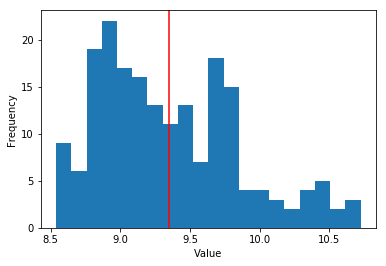

In [54]:
hist_plot(my_df['price_log'], 20)

In [66]:
# test the Pvalue and normalization 
def cutoff_stat(alpha, mean=0, sd=1, one_tailed=True):
    from scipy.stats import norm
    if((alpha > 0.0) & (alpha < 1.0)):
        if(one_tailed):
            return(norm.ppf(1.0 - alpha, loc=mean, scale=sd))
        else:
            return(norm.ppf(1.0 - alpha/2.0, loc=mean, scale=sd))
    else:   
        print('alpha must be btween 0 and 1')

In [67]:
# the H0 expected cutoff 
expected_cutoff = cutoff_stat(0.05, mean = mean_price_log, sd = std_price_log)
# the real cutoff 
real_cutoff = mean_price_log+ 2.5*(std_price_log)
if real_cutoff > expected_cutoff:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Sample looks Gaussian (fail to reject H0)


### 1.2 Price

Below is another graphic, considering price histogram plots. It doesn't look like a bell shape distribution. But we will make the null hypothesis, considering the distribution is normal anyways. Then we apply Shapiro-Wilk test method to exam H0.  Our hope is to reject the null hypothesis. We did reject the H0. 
##### <font color='red'> The price value doesn't have a normal distribution. 

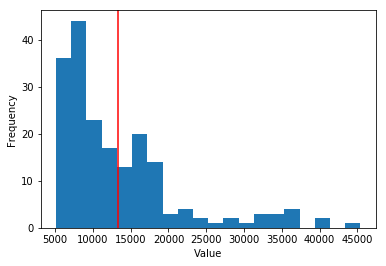

In [55]:
hist_plot(my_df['price'], 20)

In [65]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(my_df['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.801, p=0.000
Sample does not look Gaussian (reject H0)


## Task 2. Test significance of ['price']
**[ Guide to my answer ]**: The task is to test the siginificance of price, tratified by fuel type, aspiration, and rear vs. front wheel drive. I choose price over price log is because the statistic results (e.g. mean, std) of price itself are more straight forward to interpret. I stratefied sample over 10% of data, apply t test over 95% confidence interval, to compare different variables. 

In [155]:
# Define functions for t test, chi test, and plot t test. 
def t_test(a, b, alpha, alternative='two-sided'):    
    diff = a.mean() - b.mean()
    res = ss.ttest_ind(a, b)
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()
    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index) 

def hist_mean_ci(vec, t_test, bins):
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Price')

def plot_t(a, b, t_test, cols, nbins = 20):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histogram of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

In [156]:
# Create a data frame with the counts and the means of the groups
def count_mean(data, strat_name):
    groups = data.groupby(strat_name) # Create the groups
    return pd.DataFrame({'count': groups.size(), 
                        'mean': groups.aggregate(np.mean).loc[:, 'price']})
# Create stratified group
def stratify(data, p, strat_name):
    groups = data.groupby(strat_name) # Create the groups
    nums = min(groups.size()) # Find the size of the smallest group
    num = int(p * data.shape[0]) # Compute the desired number of samples per group
    if num <= nums: # If sufficient group size, sample each group and return. 
        return groups.apply(lambda x: x.sample(n=num))
    else: # Oops. p is to large
        pmax = nums / data.shape[0]
        print('The maximum value of p = ' + str(pmax))

#### 2.1 Fuel Type 
The null hypothesis here is: The fuel type won't significantly impact the auto price. From the t-test and graphic plopts below:
1. Difference in means is $2000+, I believe it is not a large number giving the auto price range. 
2. The t-statistic is small and the p-value is large. Therefore, there is a high chance that the difference in means is from random variation alone. 
3. The mean of the fuel type (gas) in the lower plot is within the confidence interval of the difference of means of the fuel types. 

##### <font color='red'>Conclusion: This confirms that we cannot reject the null hypothesis that there is no significant difference in these means. <font/> 

In [157]:
# I will use 10% of data to test the significance on fuel types
p = 0.1
stratified_fuel = stratify(my_df, p, 'fuel-type')
print ('number of rows for the stratefied sample is: ', len(stratified_fuel))
count_mean(stratified_fuel, 'fuel-type')

number of rows for the stratefied sample is:  38


c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'fuel-type' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,count,mean
fuel-type,,
diesel,19,16103.578947
gas,19,12234.052632


In [158]:
diesel = np.array(stratified_fuel.loc[stratified_fuel.loc[:, 'fuel-type'] == 'diesel', 'price'])
gas = np.array(stratified_fuel.loc[stratified_fuel.loc[:, 'fuel-type'] == 'gas', 'price'])

DegFreedom      34.194471
Difference    3869.526316
Statistic        1.328536
PValue           0.192362
Low95CI      -2048.398149
High95CI      9787.450780
dtype: float64


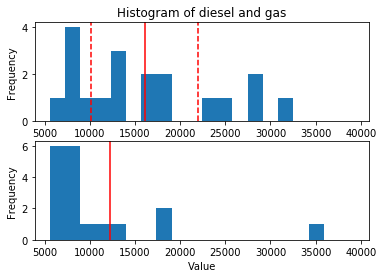

In [159]:
test_fuel = t_test(diesel, gas, alpha = 0.05) # 95% confidence interval
print(test_fuel)
plot_t(diesel, gas, test_fuel, ['diesel', 'gas'])   

#### 2.2 Aspiration
Null hypothesis for aspiration test would be: the aspiration type won't impact auto price significantly. Examine the t-test results below and I find:
1. Vehicles with standard aspiration are priced, in average, $3000 lower than turbo. I consider this price difference is not significant large. 
2. P-value is 0.21. It is small but not small enough to reject the H0. 
3. tubor car felling within the 95 percentage of standard car's confidence interval. It also means we can not reject the null hypothesis.

##### <font color = 'red'> Conclusion: Aspiration won't have signicant impact on auto price. 

In [152]:
p = 0.1
stratified_aspiration = stratify(my_df, p, 'aspiration')
print ('number of rows for the stratefied sample is: ', len(stratified_aspiration))
print (count_mean(stratified_aspiration, 'aspiration'))

number of rows for the stratefied sample is:  38
            count          mean
aspiration                     
std            19  11605.631579
turbo          19  14529.473684


c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'aspiration' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


DegFreedom      30.523215
Difference   -2923.842105
Statistic       -1.253734
PValue           0.218019
Low95CI      -7683.217867
High95CI      1835.533657
dtype: float64


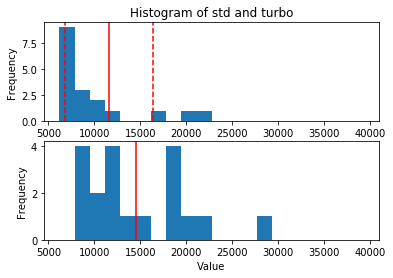

In [160]:
std = np.array(stratified_aspiration.loc[stratified_aspiration.loc[:, 'aspiration'] == 'std', 'price'])
turbo = np.array(stratified_aspiration.loc[stratified_aspiration.loc[:, 'aspiration'] == 'turbo', 'price'])
test_aspiration = t_test(std, turbo, alpha = 0.05) # 95% confidence interval
print(test_aspiration)
plot_t(std, turbo, test_aspiration, ['std', 'turbo'])   

#### 2.3 Rear v.s. Front Wheel Type
Null hypothesis for wheel type test would be: the wheel type won't impact auto price significantly. Examine the t-test results below and I find:
1. Vehicles with rear wheel drive are priced, in average, about $3000 high than front wheeled drive car. I can't consider this price is significant large. 
2. P-value is 0.21. It is small but not small enough to reject the H0. 
3. rear wheeled vehicle type drop out of the 95 percentage confidence interval for the front wheeled drive cars. It provide us a good reason to reject the null hypothesis.

##### <font color = 'red'> Conclusion: wheel type does make a difference in auto price. Normally rear wheel drive auto would raise the price. 

In [180]:
## delete '4wd' categories, since we are not examing this type of vehicle
my_df = my_df[my_df.loc[:, 'drive-wheels'] != '4wd']

p = 0.1
stratified_wheel = stratify(my_df, p, 'drive-wheels')
print ('number of rows for the stratefied sample is: ', len(stratified_wheel))
print (count_mean(stratified_wheel, 'drive-wheels'))

number of rows for the stratefied sample is:  36
              count          mean
drive-wheels                     
fwd              18   8821.166667
rwd              18  19653.277778


c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'drive-wheels' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


DegFreedom      30.523215
Difference   -2923.842105
Statistic       -1.253734
PValue           0.218019
Low95CI      -7683.217867
High95CI      1835.533657
dtype: float64


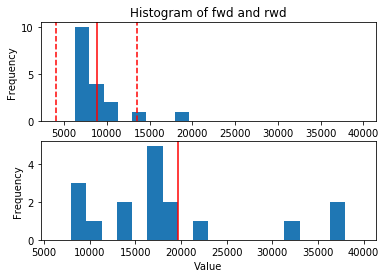

In [181]:
# front wheel drive
fwd = np.array(stratified_wheel.loc[stratified_wheel.loc[:, 'drive-wheels'] == 'fwd', 'price']) 
# rear wheel drive
rwd = np.array(stratified_wheel.loc[stratified_wheel.loc[:, 'drive-wheels'] == 'rwd', 'price'])
stratified_wheel = t_test(std, turbo, alpha = 0.05) # 95% confidence interval
print(stratified_wheel)
plot_t(fwd, rwd, stratified_wheel, ['fwd', 'rwd'])   

## Task 3. Apply ANOVA and Tukey's HSD test to the  log price 
The F statistic is fairly large and the p-value is very small! We can reject the null hypothesis that the five body type variables have the same mean, as the probability of the differences arising from random chance is quite low. 

Exam the John Tukey's Honest Significant Differences (HSD) plot below. There is a line with a dot shown for each variable. The dot is the mean and the line shows the range of the confidence interval for  that mean. If the difference in means is significant at the 95% confidence level, the confidence intervals will not overlap. 
##### <font color='red'> Conclusion: The hatchback type body is not overlay with hardtop, convertible, and sedan types. 

In [182]:
my_df['body-style'].value_counts()

sedan          89
hatchback      62
wagon          20
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [184]:
# make five types of auto body data ready
sedan = np.array(my_df.loc[my_df.loc[:, 'body-style'] == 'sedan', 'price_log']) 
hatchback = np.array(my_df.loc[my_df.loc[:, 'body-style'] == 'hatchback', 'price_log']) 
wagon = np.array(my_df.loc[my_df.loc[:, 'body-style'] == 'wagon', 'price_log']) 
hardtop = np.array(my_df.loc[my_df.loc[:, 'body-style'] == 'hardtop', 'price_log']) 
convertible = np.array(my_df.loc[my_df.loc[:, 'body-style'] == 'convertible', 'price_log']) 

Text(0.5,1,'Box Plot by Body Type')

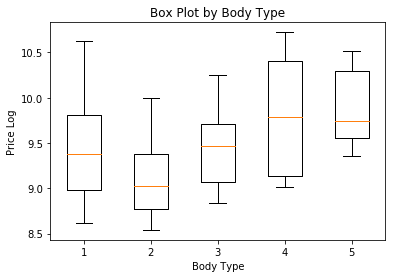

In [185]:
plt.boxplot([sedan, hatchback, wagon, hardtop, convertible])
plt.ylabel('Price Log')
plt.xlabel('Body Type')
plt.title('Box Plot by Body Type')

In [187]:
f_statistic, p_value = ss.f_oneway(sedan, hatchback, wagon, hardtop, convertible)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 8.485220881930976
P-value = 2.7049267597049833e-06


In [191]:
Tukey_HSD = pairwise_tukeyhsd(my_df['price_log'], my_df['body-style'])
print(Tukey_HSD)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
   group1     group2  meandiff  lower   upper  reject
-----------------------------------------------------
convertible  hardtop  -0.0966  -0.8119  0.6186 False 
convertible hatchback -0.7826  -1.3489 -0.2164  True 
convertible   sedan   -0.4449  -1.0035  0.1137 False 
convertible   wagon   -0.4796  -1.0961  0.1368 False 
  hardtop   hatchback  -0.686  -1.1835 -0.1885  True 
  hardtop     sedan   -0.3483  -0.8371  0.1406 False 
  hardtop     wagon    -0.383   -0.937  0.1711 False 
 hatchback    sedan    0.3377   0.1187  0.5568  True 
 hatchback    wagon    0.303   -0.0375  0.6436 False 
   sedan      wagon   -0.0347  -0.3624  0.293  False 
-----------------------------------------------------


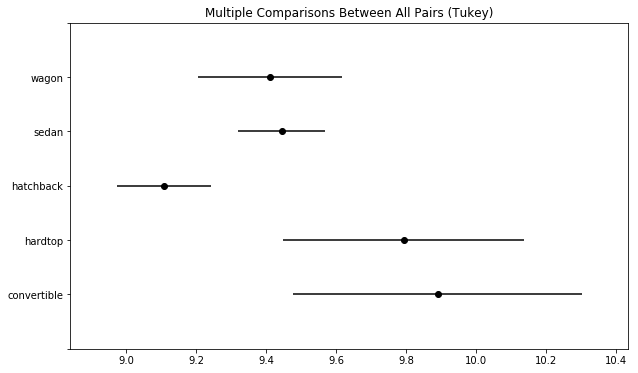

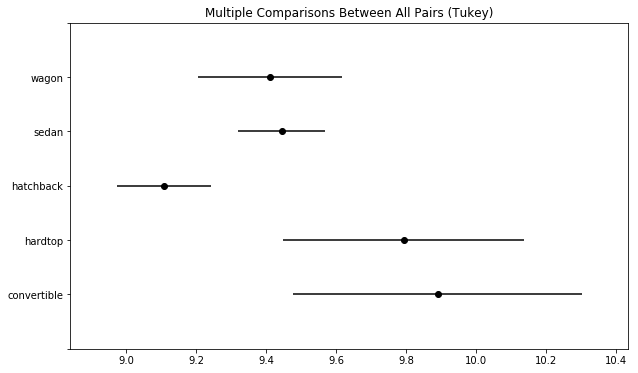

In [193]:
Tukey_HSD.plot_simultaneous()

In [196]:
print ('Thanks for reviewing, keep warm from the snow days!')

Thanks for reviewing, keep warm from the snow days!
